In [1]:
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
import seaborn as seabornInstance 
from sklearn import linear_model
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.preprocessing import Normalizer
from collections import Counter
import statsmodels.api as sm
# from timeseries import WindowSlider

In [2]:
# import CSV files (2019-2011)
dfs = []
for i in range (11,20):
    file_path = f"sof_dev_data/20{i}_data.csv"
    df = pd.read_csv(file_path)
    df["Year"] = f"20{i}"
    dfs.append(df)
combined_df = pd.concat(dfs, ignore_index=True)
combined_df

,Occupation,Total_employed,20_to_24_years,25_to_34_years,35_to_44_years,45_to_54_years,55_to_64_years,Number_of_workers,Median_weekly_earnings,Men_Number_of_workers,Men_Median_weekly_earnings,Women_Number_of_workers,Women_Median_weekly_earnings,Black,Asian,Hispanic_or_Latino,Year
0,Computer and information systems managers,553,10,103,199,162,74,530,1579,392,1595,138,1543,5.7,12.9,3.8,2011
1,Web developers,182,20,61,58,28,12,117,1017,81,1033,35,0,5.9,11.1,6.9,2011
2,Computer and information research scientists,20,3,7,5,3,2,19,0,17,0,2,0,0.0,0.0,0.0,2011
3,Computer systems analysts,447,12,109,113,133,64,373,1328,242,1410,132,1144,7.1,14.9,4.4,2011
4,"Computer occupations, all other",306,21,81,74,81,37,282,1127,221,1165,61,998,8.8,11.9,6.5,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Network and computer systems administrators,199,8,48,65,50,25,194,1447,144,1541,50,1233,9.7,11.7,8.5,2019
122,Database administrators,106,5,21,29,27,18,96,1642,67,1752,29,0,6.8,16.7,6.2,2019
123,Computer support specialists,547,36,158,145,119,68,486,1192,365,1223,121,1103,10.5,12.7,11.3,2019
124,Computer programmers,454,19,117,105,116,72,425,1586,343,1613,82,1463,8.5,21.8,8.7,2019


In [3]:
sd_df = combined_df.loc[combined_df["Occupation"]=="Software developers, applications and systems software"]
sd_df = sd_df.drop(columns=['Number_of_workers','Men_Median_weekly_earnings','Men_Number_of_workers',\
                          'Women_Median_weekly_earnings','Women_Number_of_workers','Occupation'])
# sd_df = sd_df.iloc[:, 1:] used to drop the first column, when 'Number of workers' couldn't be removed --fixed .csv 

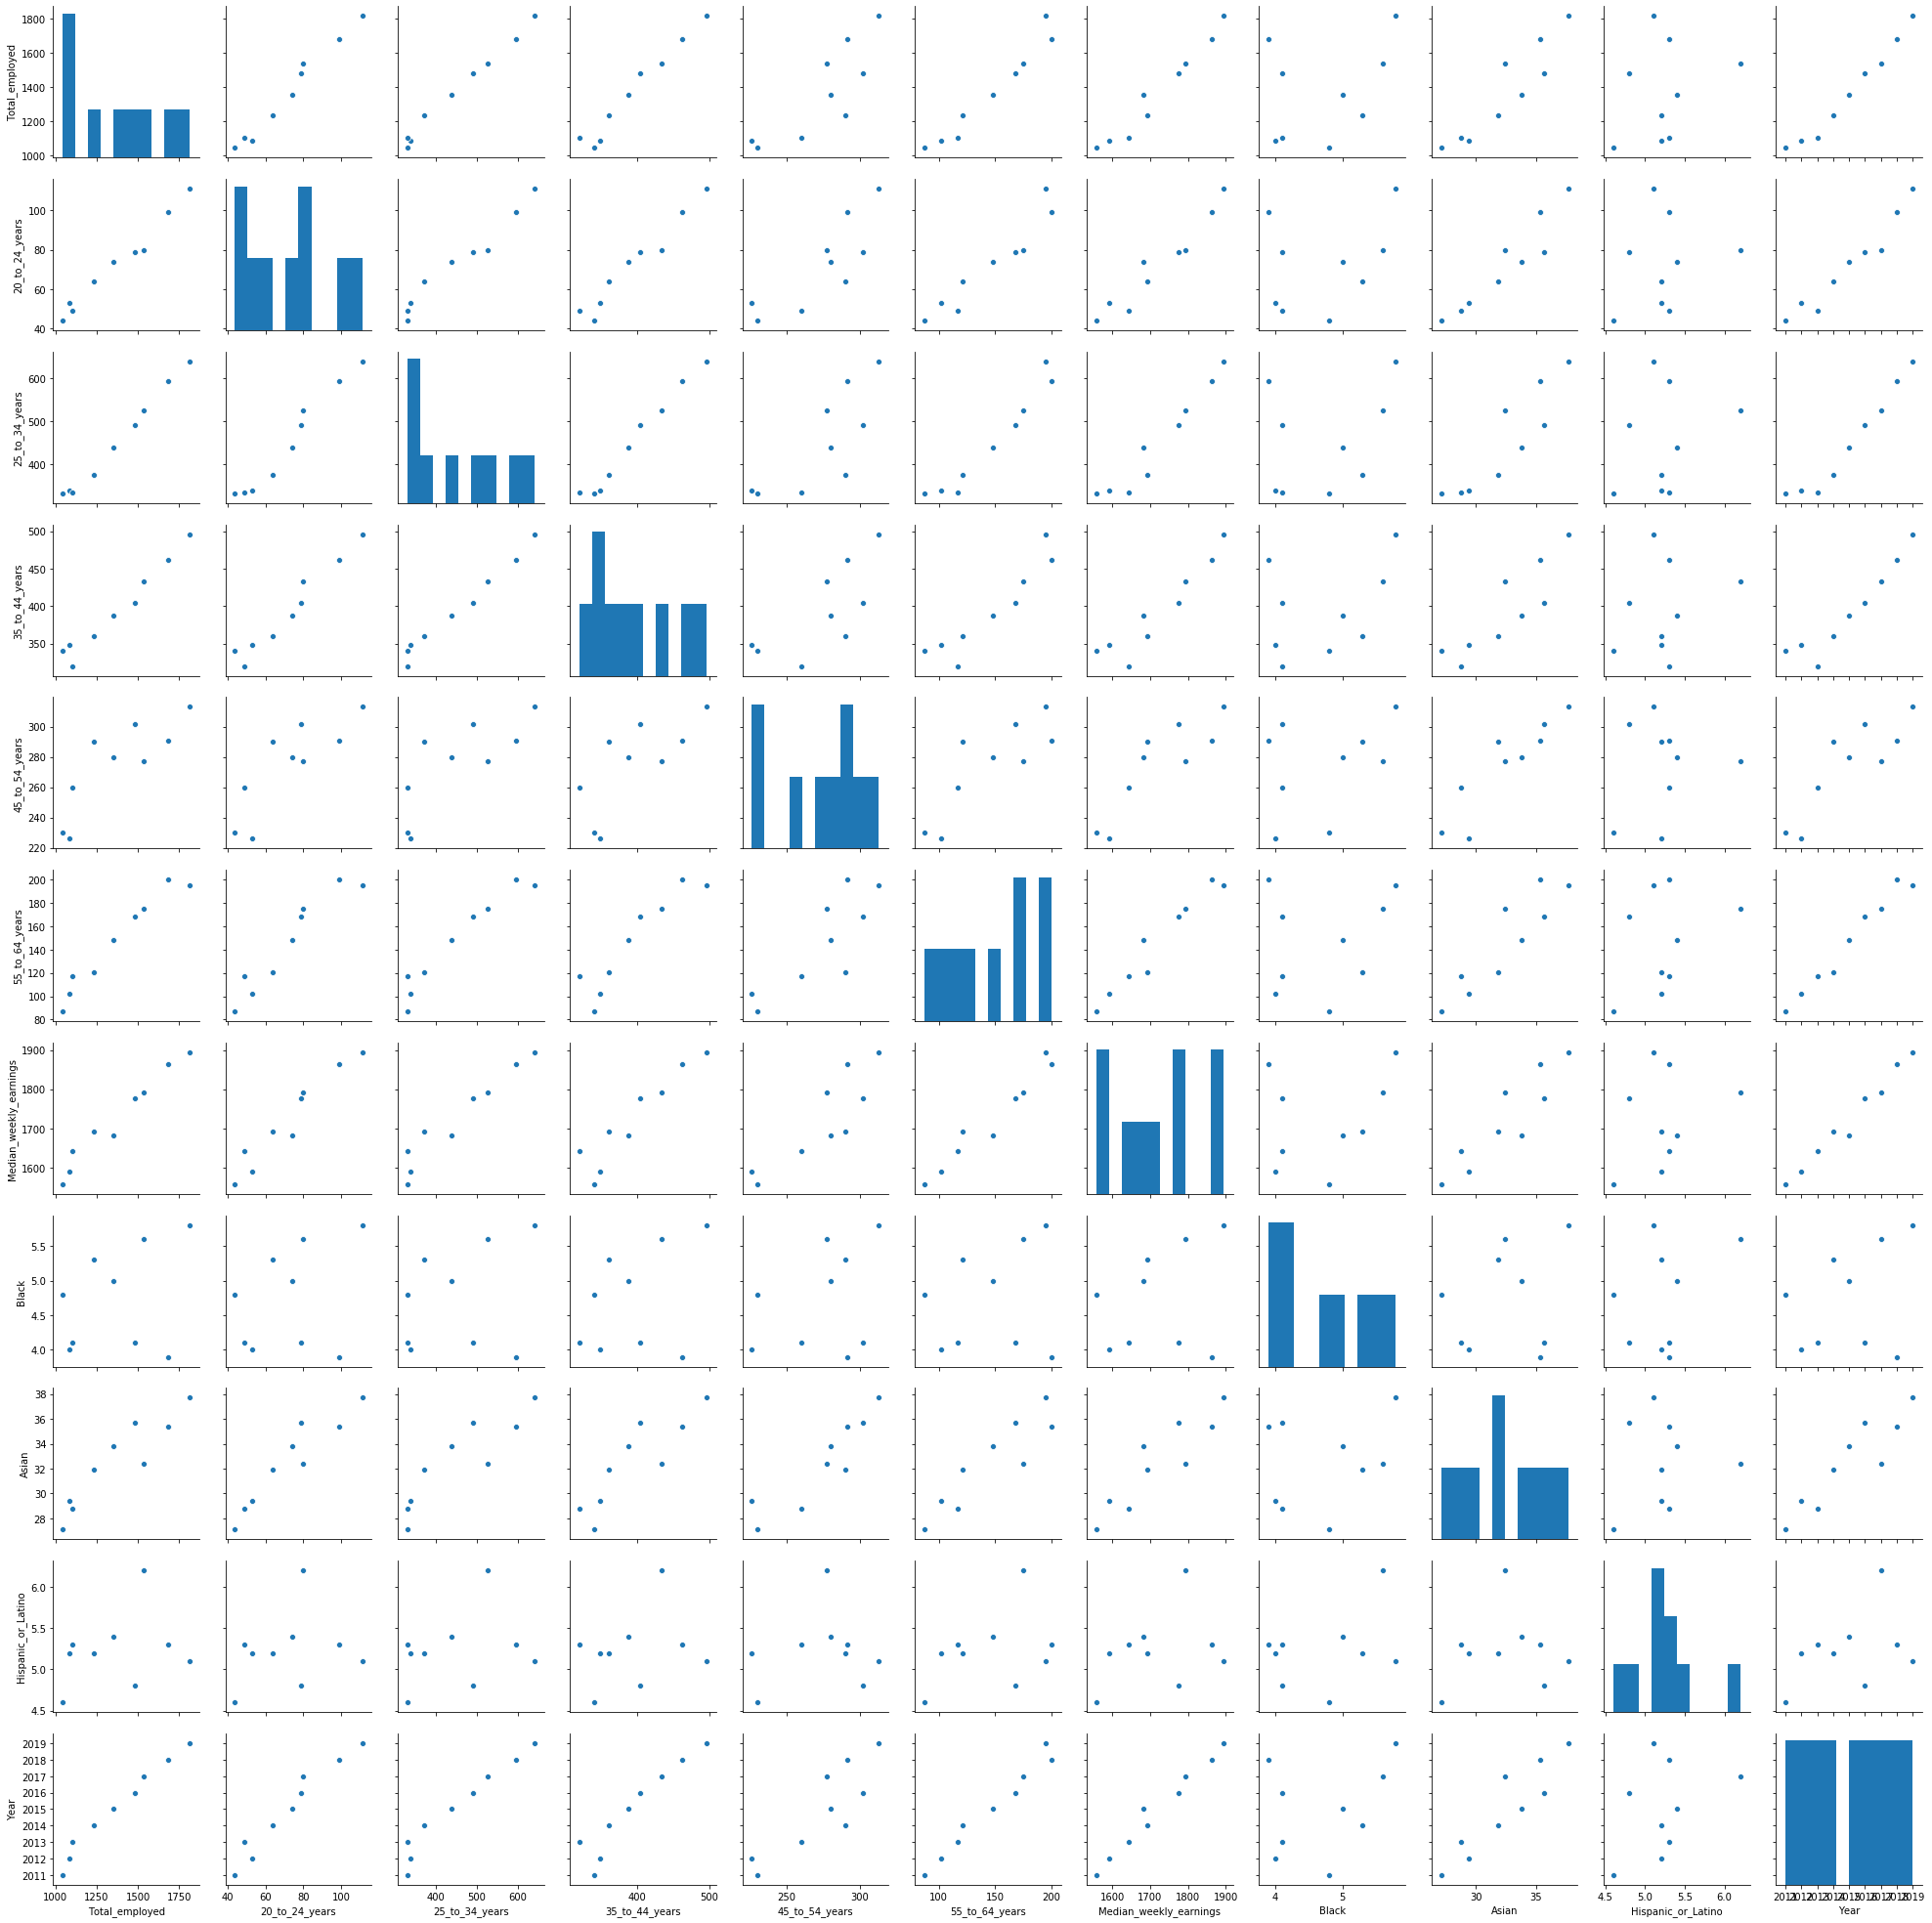

In [4]:
# print relationships between data
sb.pairplot(sd_df)

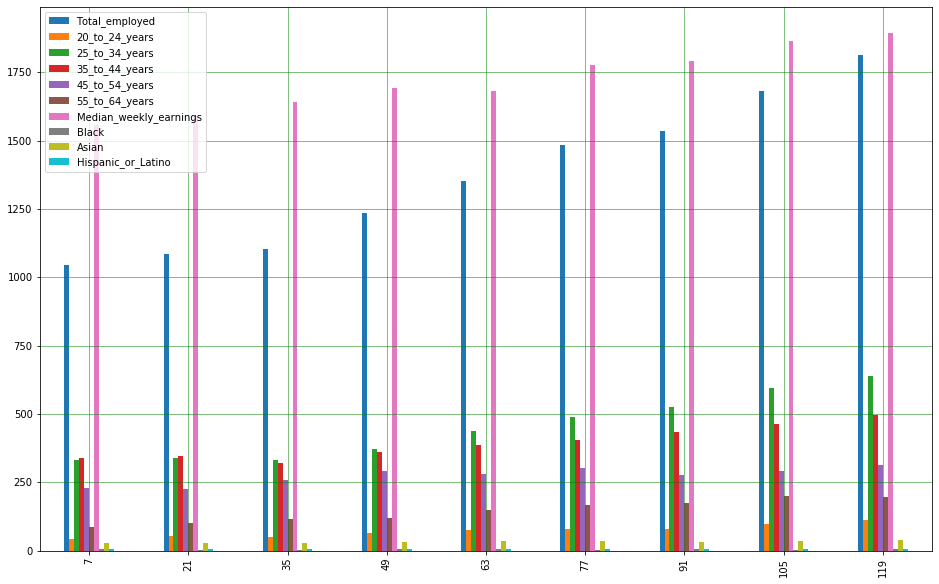

In [5]:
df1 = sd_df.head(16)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [6]:
sd_df

,Total_employed,20_to_24_years,25_to_34_years,35_to_44_years,45_to_54_years,55_to_64_years,Median_weekly_earnings,Black,Asian,Hispanic_or_Latino,Year
7,1044,44,331,340,230,87,1558,4.8,27.1,4.6,2011
21,1084,53,338,348,226,102,1591,4.0,29.4,5.2,2012
35,1103,49,332,320,260,117,1643,4.1,28.8,5.3,2013
49,1235,64,373,360,290,121,1693,5.3,31.9,5.2,2014
63,1353,74,438,387,280,148,1682,5.0,33.8,5.4,2015
77,1483,79,490,404,302,168,1776,4.1,35.7,4.8,2016
91,1536,80,526,433,277,175,1792,5.6,32.4,6.2,2017
105,1682,99,595,462,291,200,1864,3.9,35.4,5.3,2018
119,1815,111,640,496,313,195,1894,5.8,37.7,5.1,2019


# Hispanic and Latino (%) Prediction

In [7]:
X = sd_df.drop(columns=['Hispanic_or_Latino','Total_employed'])
y = sd_df['Hispanic_or_Latino']

In [8]:
# train models
linreg = linear_model.LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print('Intercept: \n', linreg.intercept_)
print('Coefficients: \n', linreg.coef_)
y_pred = linreg.score(X, y)
print(y_pred)

Intercept: 
 -562.2237534164378
Coefficients: 
 [-0.00099144 -0.02401549  0.01369867 -0.02183942  0.04075385  0.00247103
  0.42581946 -0.02336989  0.28163897]
1.0


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7, 9)
(7,)
(2, 9)
(2,)


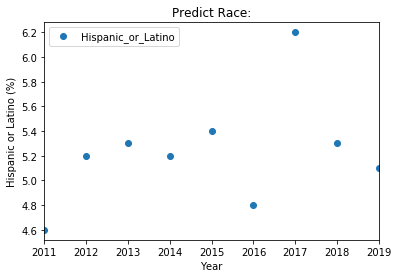

In [13]:
sd_df.plot(x='Year', y='Hispanic_or_Latino', style='o')  
plt.title('Predict Race:')  
plt.xlabel('Year')  
plt.ylabel('Hispanic or Latino (%)')
plt.show()

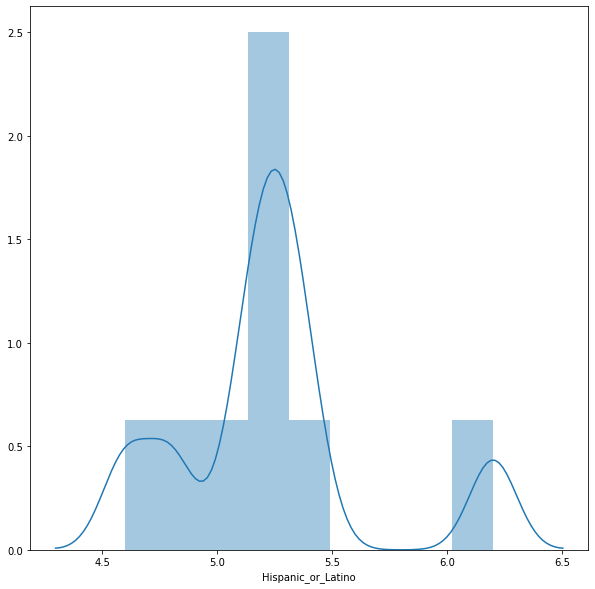

In [14]:
plt.figure(figsize=(10,10))
plt.tight_layout()
seabornInstance.distplot(sd_df['Hispanic_or_Latino'])

In [15]:
# X = sd_df['Year'].values.reshape(-1,1)
# y = sd_df['Hispanic_or_Latino'].values.reshape(-1,1)

In [16]:
X_min = np.array([X.min()])
X_max = np.array([X.max()])
y_min = linreg.predict(X_min)
y_max = linreg.predict(X_max)
y_min
# X.min()

array([4.03014683])

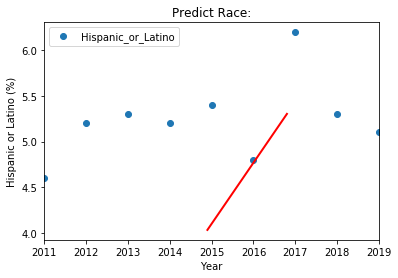

In [17]:
sd_df.plot(x='Year', y='Hispanic_or_Latino', style='o')  
plt.title('Predict Race:')  
plt.xlabel('Year')  
plt.ylabel('Hispanic or Latino (%)')   
plt.plot([X_min[0], X_max[0]], [y_min[0], y_max[0]], color='red', linewidth=2)
plt.show()

In [18]:
sd_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
sd_df.head()

,Actual,Predicted
105,5.3,1.0
35,5.3,1.0
